In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [80]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [81]:
import pandas as pd
import os

In [82]:
train=pd.read_csv('files/train.csv')

In [83]:
test=pd.read_csv('files/test.csv')

In [84]:
train_cats(train)
apply_cats(df=test, trn=train)

In [85]:
# train.head().T

In [86]:
# train.isnull().sum().sort_index().sort_values()[-20:]/len(train)

In [97]:
X_train, y_train, nas = proc_df(train, 'SalePrice',max_n_cat=20)
X_test,_,nas = proc_df(test, na_dict=nas)
X_train, y_train, nas = proc_df(train, 'SalePrice', na_dict=nas)

In [98]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,GarageYrBlt_na,GarageCars_na,GarageArea_na
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,False


In [89]:
# test.info()

In [99]:
m=RandomForestRegressor(n_jobs=-1)
m.fit(X_train,y_train)
m.score(X_train,y_train)

/home/akhil/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9791318786864046

In [100]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print(m.score(X_train,y_train),m.oob_score_)

0.9574551397371329 0.8458559066976865


In [101]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print(m.score(X_train,y_train),m.oob_score_)

0.9347540075608265 0.8339979181463273


### feature-importance

In [102]:
fi=rf_feat_importance(m,X_train)
fi

,cols,imp
17,OverallQual,0.106813
46,GrLivArea,0.092282
38,TotalBsmtSF,0.083183
61,GarageCars,0.079872
27,ExterQual,0.078580
62,GarageArea,0.058358
19,YearBuilt,0.049579
43,1stFlrSF,0.038705
4,LotArea,0.031270
53,KitchenQual,0.029186


In [103]:
X_train.shape

(1460, 91)

In [104]:
y_train.shape

(1460,)

In [105]:
fi

,cols,imp
17,OverallQual,0.106813
46,GrLivArea,0.092282
38,TotalBsmtSF,0.083183
61,GarageCars,0.079872
27,ExterQual,0.078580
62,GarageArea,0.058358
19,YearBuilt,0.049579
43,1stFlrSF,0.038705
4,LotArea,0.031270
53,KitchenQual,0.029186


In [116]:
keep=fi
len(keep)

91

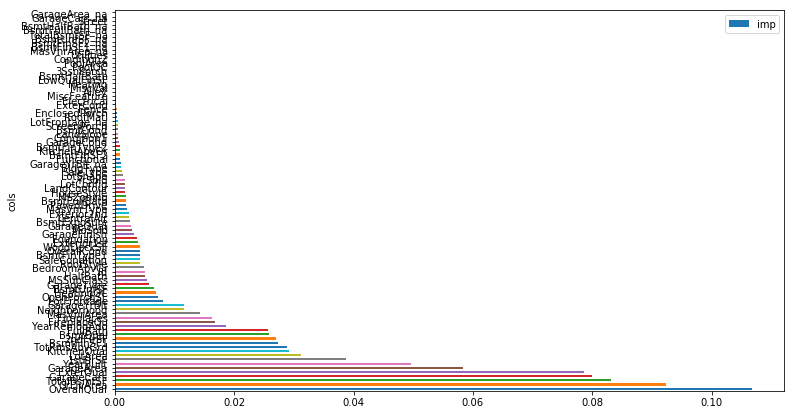

In [117]:
keep.plot('cols','imp','barh',figsize=(12,7))

In [118]:
X_train_keep=X_train[keep.cols].copy()

In [119]:
X_train_keep.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,ExterQual,GarageArea,YearBuilt,1stFlrSF,LotArea,KitchenQual,...,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,Street,GarageCars_na,GarageArea_na
0,7,1710,856,2,3,548,2003,856,8450,3,...,False,False,False,False,False,False,False,2,False,False
1,6,1262,1262,2,4,460,1976,1262,9600,4,...,False,False,False,False,False,False,False,2,False,False
2,7,1786,920,2,3,608,2001,920,11250,3,...,False,False,False,False,False,False,False,2,False,False
3,7,1717,756,3,4,642,1915,961,9550,3,...,False,False,False,False,False,False,False,2,False,False
4,8,2198,1145,3,3,836,2000,1145,14260,3,...,False,False,False,False,False,False,False,2,False,False


In [120]:
test1=X_test[keep.cols].copy()

In [121]:
test1.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,ExterQual,GarageArea,YearBuilt,1stFlrSF,LotArea,KitchenQual,...,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,Street,GarageCars_na,GarageArea_na
0,5,896,882.0,1.0,4,730.0,1961,896,11622,4,...,False,False,False,False,False,False,False,2,False,False
1,6,1329,1329.0,1.0,4,312.0,1958,1329,14267,3,...,False,False,False,False,False,False,False,2,False,False
2,5,1629,928.0,2.0,4,482.0,1997,928,13830,4,...,False,False,False,False,False,False,False,2,False,False
3,6,1604,926.0,2.0,4,470.0,1998,926,9978,3,...,False,False,False,False,False,False,False,2,False,False
4,8,1280,1280.0,2.0,3,506.0,1992,1280,5005,3,...,False,False,False,False,False,False,False,2,False,False


In [122]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=-1, oob_score=True)
m.fit(X_train_keep, y_train)
print(m.score(X_train_keep,y_train),m.oob_score_)

0.9379950732108583 0.837538378573057


In [123]:
import os
if not os.path.exists('tmp'):
    os.makedirs('tmp')

In [124]:
def predict_and_save(m,test_set,out_name):
    out=pd.DataFrame({
        "Id":test["Id"],
        "SalePrice":m.predict(test_set)
    })
    out.to_csv('tmp/'+str(out_name)+".csv",index=False)

In [125]:
predict_and_save(m,test1,'out2')